In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import random      
import copy
from matplotlib import animation

In [ ]:
# 参数设置

In [67]:
food_num = 30
dim = 2
trial_max = 20
iter_max = 100
value_range = 10
employ_num = 50

In [ ]:
# 代价函数

In [33]:
def rastrigin(x):
    Z = 10 * dim
    for i in range(dim):
        Z = Z + x[i] ** 2 - 10 * np.cos(2 * np.pi * x[i])
    return Z

In [63]:
class ABC:
    def __init__(_self):
        _self.foods = np.zeros((food_num, dim))
        _self.f = np.ones((food_num))
        _self.trial = np.zeros((food_num))
        _self.prob = [0 for x in range(food_num)]
        _self.solution = np.zeros((food_num))
        _self.globalParams = [0 for x in range(dim)]
        _self.globalOpt = 9999
        _self.evalCount = 0

        random.seed()

    def calculate_function(_self, sol):
        result = rastrigin(sol)
        return [result]

    def increase_eval(_self):
        _self.evalCount += 1

    def stopping_condition(_self):
        status = bool(_self.evalCount >= iter_max)
        return status

    def memorize_best_source(_self):
        for i in range(food_num):
            if (_self.f[i] < _self.globalOpt):
                _self.globalOpt = np.copy(_self.f[i])
                _self.globalParams = np.copy(_self.foods[i][:])

    def init(_self, index):
        if (not (_self.stopping_condition())):
            for i in range(dim):
                _self.foods[index][i] = random.random() * (value_range - (-value_range)) + (-value_range)
            _self.solution = np.copy(_self.foods[index][:])
            _self.f[index] = _self.calculate_function(_self.solution)[0]
            _self.trial[index] = 0

    def initial(_self):
        for i in range(food_num):
            _self.init(i)
        _self.globalOpt = np.copy(_self.f[0])
        _self.globalParams = np.copy(_self.foods[0][:])

    def send_employed_bees(_self):
        i = 0
        while (i < food_num) and (not (_self.stopping_condition())):
            r = random.random()
            _self.param2change = (int)(r * dim)

            r = random.random()
            _self.neighbour = (int)(r * food_num)
            while _self.neighbour == i:
                r = random.random()
                _self.neighbour = (int)(r * food_num)
            _self.solution = np.copy(_self.foods[i][:])

            r = random.random()
            _self.solution[_self.param2change] = _self.foods[i][_self.param2change] + (
                        _self.foods[i][_self.param2change] - _self.foods[_self.neighbour][_self.param2change]) * (
                                                             r - 0.5) * 2

            if _self.solution[_self.param2change] < -value_range:
                _self.solution[_self.param2change] = -value_range
            if _self.solution[_self.param2change] > value_range:
                _self.solution[_self.param2change] = value_range
            _self.ObjValSol = _self.calculate_function(_self.solution)[0]
            if (_self.ObjValSol < _self.f[i]):
                _self.trial[i] = 0
                _self.foods[i][:] = np.copy(_self.solution)
                _self.f[i] = _self.ObjValSol
            else:
                _self.trial[i] = _self.trial[i] + 1
            i += 1

    def calculate_probabilities(_self):
        minf = np.copy(min(_self.f))
        for i in range(food_num):
            _self.prob[i] = (0.9 * ((1/(1+_self.f[i])) / (1/(1+minf)))) + 0.1

    def send_onlooker_bees(_self):
        i = 0
        t = 0
        while (t < food_num) and (not (_self.stopping_condition())):
            r = random.random()
            if ((r < _self.prob[i]) or (r > _self.prob[i])):
                t+=1
                r = random.random()
                _self.param2change = (int)(r * dim)
                r = random.random()
                _self.neighbour = (int)(r * food_num)
                while _self.neighbour == i:
                    r = random.random()
                    _self.neighbour = (int)(r * food_num)
                _self.solution = np.copy(_self.foods[i][:])

                r = random.random()
                _self.solution[_self.param2change] = _self.foods[i][_self.param2change] + (
                            _self.foods[i][_self.param2change] - _self.foods[_self.neighbour][_self.param2change]) * (
                                                                 r - 0.5) * 2
                if _self.solution[_self.param2change] < -value_range:
                    _self.solution[_self.param2change] = -value_range
                if _self.solution[_self.param2change] > value_range:
                    _self.solution[_self.param2change] = value_range

                _self.ObjValSol = _self.calculate_function(_self.solution)[0]
                if (_self.ObjValSol < _self.f[i]):
                    _self.trial[i] = 0
                    _self.foods[i][:] = np.copy(_self.solution)
                    _self.f[i] = _self.ObjValSol
                else:
                    _self.trial[i] = _self.trial[i] + 1
            i += 1
            i = i % food_num

    def send_scout_bees(_self):
        if np.amax(_self.trial) >= trial_max:
            _self.init(_self.trial.argmax(axis = 0))

In [68]:
x_arr = []
best_aff_arr = []
best_pos_arr = []
abc = ABC()
print('--------------初始化------------')
abc.initial()
abc.memorize_best_source()
while(not(abc.stopping_condition())):
    print('--------------第'+str(abc.evalCount+1)+'步------------')
    abc.send_employed_bees()
    abc.calculate_probabilities()
    abc.send_onlooker_bees()
    abc.memorize_best_source()
    abc.send_scout_bees()
    abc.increase_eval()
    print('最佳的适应度值为：',abc.globalOpt)
    print('粒子到过最优位置为：',abc.globalParams)
    x_arr.append(copy.deepcopy(abc.foods))
    best_aff_arr.append(abc.globalOpt)
    best_pos_arr.append(copy.deepcopy(abc.globalParams))
print('达到终止条件，运行结束')

--------------初始化------------
--------------第1步------------
最佳的适应度值为： 13.870288250821442
粒子到过最优位置为： [-2.00864231  3.05112599]
--------------第2步------------
最佳的适应度值为： 10.84844908933637
粒子到过最优位置为： [-0.98213068  3.05112599]
--------------第3步------------
最佳的适应度值为： 9.328552856087583
粒子到过最优位置为： [-0.16229246 -0.1575707 ]
--------------第4步------------
最佳的适应度值为： 3.2122792455633853
粒子到过最优位置为： [ 1.00388339 -0.10735482]
--------------第5步------------
最佳的适应度值为： 1.5804443317440935
粒子到过最优位置为： [1.00388339 0.0538416 ]
--------------第6步------------
最佳的适应度值为： 1.5804443317440935
粒子到过最优位置为： [1.00388339 0.0538416 ]
--------------第7步------------
最佳的适应度值为： 1.5804443317440935
粒子到过最优位置为： [1.00388339 0.0538416 ]
--------------第8步------------
最佳的适应度值为： 1.5804443317440935
粒子到过最优位置为： [1.00388339 0.0538416 ]
--------------第9步------------
最佳的适应度值为： 1.5804443317440935
粒子到过最优位置为： [1.00388339 0.0538416 ]
--------------第10步------------
最佳的适应度值为： 1.0800585150270496
粒子到过最优位置为： [ 1.00388339 -0.01870049]
--------------第11步---

<IPython.core.display.Javascript object>


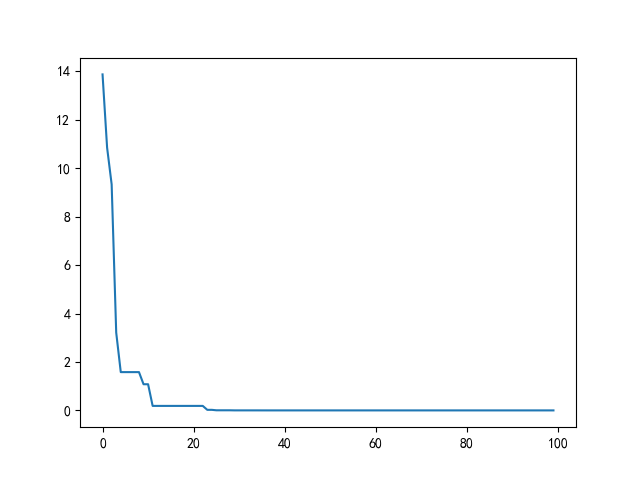

In [69]:
%matplotlib notebook 
plt.plot(best_aff_arr)
plt.show()

<IPython.core.display.Javascript object>


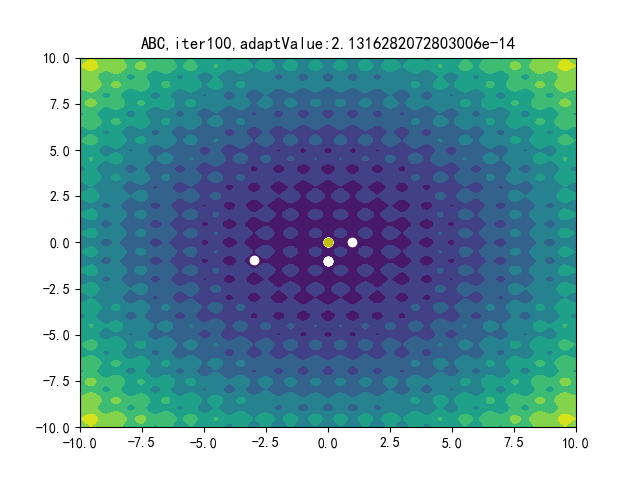

In [70]:
%matplotlib notebook 
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
fig, ax = plt.subplots()
xdata = x_arr
best_data = best_pos_arr
n = 500
x = np.linspace(-value_range, value_range, n)
y = np.linspace(-value_range, value_range, n)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, rastrigin([X,Y]))
point1, = plt.plot(xdata[0][:,0],xdata[0][:,1], 'wo')
point2, = plt.plot(best_data[0][0],best_data[0][1], 'yo')

def init():
    ax.set_xlim(-value_range, value_range)
    ax.set_ylim(-value_range, value_range)
    return point1,point2

def update(frame):  # 帧
    point1.set_data(xdata[frame][:,0],xdata[frame][:,1])
    point2.set_data(best_data[frame][0],best_data[frame][1])
    i = frame
    a = rastrigin(best_data[frame])
    ax.set_title('ABC,iter'+str(i+1)+',adaptValue:'+str(a),loc = 'center')
    return point1,point2

ani = animation.FuncAnimation(
    fig=fig,
    func=update,
    frames=range(len(x_arr)),
    init_func=init,
    interval=200,  # 时间间隔: 毫秒
    repeat=False)


plt.show()
ani.save('ABC.gif',writer='pillow')